In [62]:
import requests
from config import weather_api_key

In [63]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f864030b7219f496644943da56939fa4


In [64]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [65]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [67]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [68]:
from citipy import citipy

In [69]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | maturin
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | slave lake
Processing Record 5 of Set 1 | bowen
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | ponta delgada
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | port hedland
Processing Record 16 of Set 1 | bolshaya murta
City not found. Skipping...
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | scarborough
Processing Record 19 of Set 1 | chagda
City not found. Skipping...
Processing Record 20 of Set 1 | san patricio
Processing Rec

Processing Record 33 of Set 4 | barrow
Processing Record 34 of Set 4 | bengkulu
Processing Record 35 of Set 4 | zaysan
Processing Record 36 of Set 4 | praia
Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | ligayan
Processing Record 39 of Set 4 | ban nahin
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | kota belud
Processing Record 43 of Set 4 | alexandria
Processing Record 44 of Set 4 | neiafu
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | kangaatsiaq
Processing Record 47 of Set 4 | mayor pablo lagerenza
Processing Record 48 of Set 4 | szank
Processing Record 49 of Set 4 | bazarnyye mataki
Processing Record 50 of Set 4 | kolo
Processing Record 1 of Set 5 | hamilton
Processing Record 2 of Set 5 | talara
Processing Record 3 of Set 5 | halifax
Processing Record 4 of Set 5 | bambanglipuro
Processing Record 5 of Set 5 | kununurra
Processing Recor

Processing Record 26 of Set 8 | buraydah
Processing Record 27 of Set 8 | daru
Processing Record 28 of Set 8 | batemans bay
Processing Record 29 of Set 8 | yaan
Processing Record 30 of Set 8 | pavlogradka
Processing Record 31 of Set 8 | moose factory
Processing Record 32 of Set 8 | saleaula
City not found. Skipping...
Processing Record 33 of Set 8 | ahipara
Processing Record 34 of Set 8 | aksha
Processing Record 35 of Set 8 | vaitape
Processing Record 36 of Set 8 | belmonte
Processing Record 37 of Set 8 | tambacounda
Processing Record 38 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 39 of Set 8 | hami
Processing Record 40 of Set 8 | huilong
Processing Record 41 of Set 8 | januaria
Processing Record 42 of Set 8 | raub
Processing Record 43 of Set 8 | timizart
Processing Record 44 of Set 8 | muleba
Processing Record 45 of Set 8 | suntar
Processing Record 46 of Set 8 | marzuq
Processing Record 47 of Set 8 | kulhudhuffushi
Processing Record 48 of Set 8 | ribita
Processing

Processing Record 16 of Set 12 | saskylakh
Processing Record 17 of Set 12 | umm lajj
Processing Record 18 of Set 12 | marsh harbour
Processing Record 19 of Set 12 | kibala
Processing Record 20 of Set 12 | tura
Processing Record 21 of Set 12 | tahoua
Processing Record 22 of Set 12 | khovu-aksy
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | stephenville
Processing Record 25 of Set 12 | tambo
Processing Record 26 of Set 12 | lompoc
Processing Record 27 of Set 12 | alice
Processing Record 28 of Set 12 | riverton
Processing Record 29 of Set 12 | xunchang
Processing Record 30 of Set 12 | nalut
Processing Record 31 of Set 12 | spring hill
Processing Record 32 of Set 12 | kloulklubed
Processing Record 33 of Set 12 | dungarpur
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | pacifica
Processing Record 36 of Set 12 | saint-francois
Processing Record 37 of Set 12 | nikolayevsk-na-amure
Processing Record 38 of Set 12 | ilek
Processing Record

In [70]:
len(city_data)

556

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,64.00,94,0,5.75,ZA,2021-04-22 02:41:53
1,Maturin,9.7500,-63.1767,73.04,88,23,5.61,VE,2021-04-22 02:42:22
2,Vaini,-21.2000,-175.2000,84.20,79,75,8.05,TO,2021-04-22 02:42:22
3,Slave Lake,55.2834,-114.7690,35.60,93,90,19.57,CA,2021-04-22 02:42:22
4,Bowen,-20.0167,148.2333,78.80,65,40,9.22,AU,2021-04-22 02:42:23


In [72]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-04-22 02:41:53,-33.9258,18.4232,64.00,94,0,5.75
1,Maturin,VE,2021-04-22 02:42:22,9.7500,-63.1767,73.04,88,23,5.61
2,Vaini,TO,2021-04-22 02:42:22,-21.2000,-175.2000,84.20,79,75,8.05
3,Slave Lake,CA,2021-04-22 02:42:22,55.2834,-114.7690,35.60,93,90,19.57
4,Bowen,AU,2021-04-22 02:42:23,-20.0167,148.2333,78.80,65,40,9.22


In [73]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [74]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [75]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/21/21'

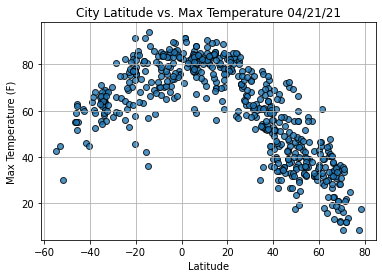

In [76]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

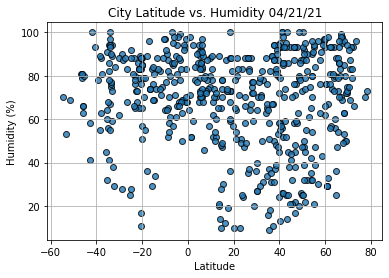

In [77]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

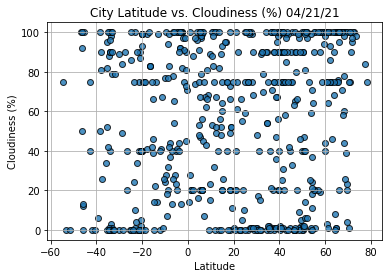

In [78]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

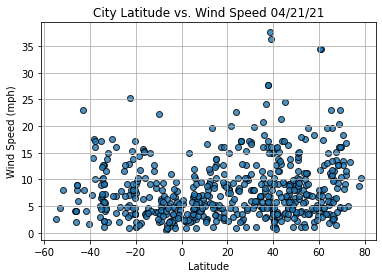

In [79]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [101]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [102]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-04-22 02:40:29
Lat                       42.6001
Lng                      -73.9662
Max Temp                       34
Humidity                       59
Cloudiness                     58
Wind Speed                      3
Name: 13, dtype: object

In [103]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Maturin,VE,2021-04-22 02:42:22,9.7500,-63.1767,73.04,88,23,5.61
3,Slave Lake,CA,2021-04-22 02:42:22,55.2834,-114.7690,35.60,93,90,19.57
6,Ponta Delgada,PT,2021-04-22 02:42:23,37.7333,-25.6667,64.40,94,75,27.63
9,Upernavik,GL,2021-04-22 02:42:24,72.7868,-56.1549,13.64,66,100,4.99
13,Albany,US,2021-04-22 02:40:29,42.6001,-73.9662,34.00,59,58,3.00


In [104]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))